<a href="https://colab.research.google.com/github/YuvarajGML/YuvarajGML/blob/main/Image_Dimension_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   In this Project , a sample image is dimensionally reduced using KMeans Cluster Algorithm

*   Also a Gaussian Plot has been used to see if pixel densities change when the image is scaled down

*  This Mini-Project has been inspired from Jake VanderPlas's  Python Data Science Handbook and is part of paper replication



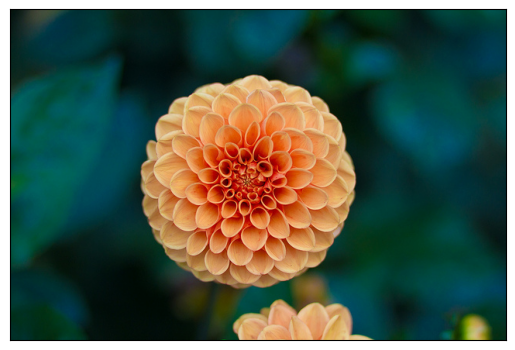

In [ ]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[] , yticks=[])
ax.imshow(flower)
data = flower /255.0 # scaling the pixels from the range of [0,1] useful for machine learning algorithms
data = data.reshape(-1,3) # to make the data 2-dimensional and in form of [ width*height , pixels]



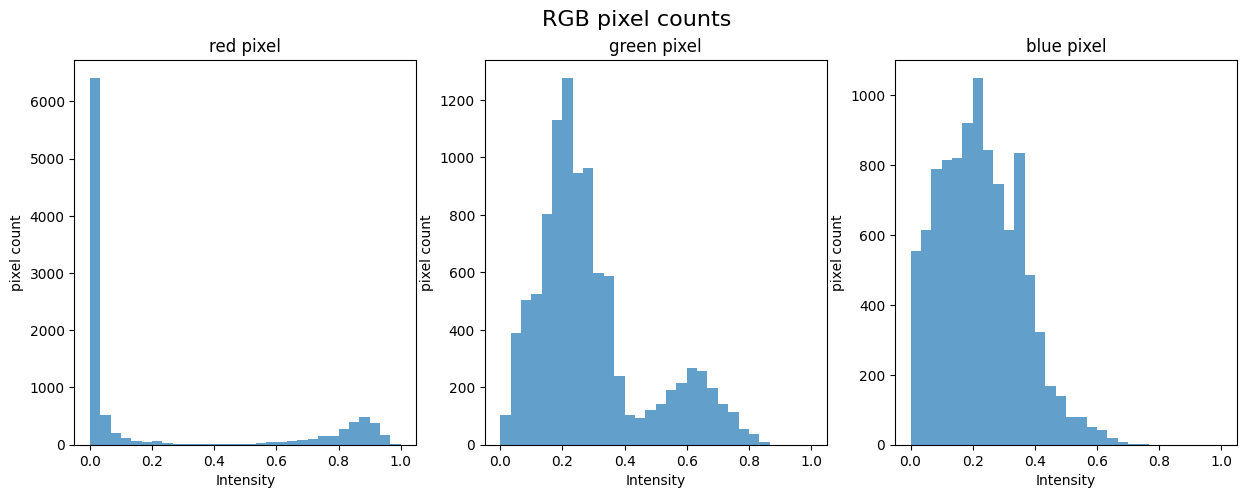

In [ ]:
def plot_pixel_histo(data , title , colors=None , N=10000):
  if colors is None:
    colors= data
  rng = np.random.default_rng(42)# to randomize number generation
  i = rng.permutation(data.shape[0])[:N] # used for selection of 'N' number of pixels at random for plotting in the histogram
  colors = colors[i]
  data = data[i]
  R ,G ,B = data.T # to gain individual components of data
  fig ,ax = plt.subplots(1,3 , figsize=(15,5))
  ax[0].hist(R , bins=30 , range=(0,1) , alpha=0.7)
  ax[0].set_title("red pixel")
  ax[0].set_xlabel("Intensity")
  ax[0].set_ylabel('pixel count')

  ax[1].hist(G , bins=30 , range=(0,1) , alpha=0.7)
  ax[1].set_title("green pixel")
  ax[1].set_xlabel("Intensity")
  ax[1].set_ylabel('pixel count')

  ax[2].hist(B , bins=30 , range=(0,1) , alpha=0.7)
  ax[2].set_title("blue pixel")
  ax[2].set_xlabel('Intensity')
  ax[2].set_ylabel('pixel count')

  plt.suptitle(title, fontsize=16)
  plt.show()
plot_pixel_histo(data , "RGB pixel counts")




We can see that the sharp edges of the histograms due to the fitting of the bins makes it difficult to interpret. We can solve that plotting a Gaussian Distribution.

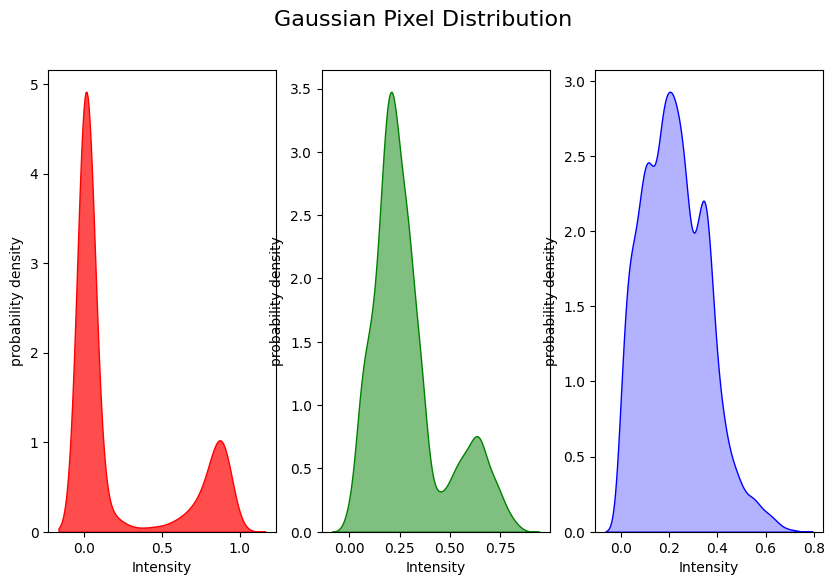

In [ ]:
def gaus_plot(data , title , colors=None , N=10000):
  if colors is None:
    colors= data
  rng = np.random.default_rng(42)
  i = rng.permutation(data.shape[0])[:N]
  colors =colors[i]
  R ,G , B = data[i].T
  fig, ax = plt.subplots(1,3,figsize=(10, 6))
  sns.kdeplot(R ,  label='Red pixels' , color='red' , ax=ax[0] ,alpha=0.7 , fill=True)
  ax[0].set_xlabel('Intensity')
  ax[0].set_ylabel('probability density')

  sns.kdeplot(G ,  label='Green pixels' , color='green'  , ax=ax[1],  alpha=0.5 , fill=True)
  ax[1].set_xlabel('Intensity')
  ax[1].set_ylabel('probability density')

  sns.kdeplot(B ,  label='Blue pixels' , color='blue'  ,ax=ax[2] ,  alpha=0.3, fill=True)
  ax[2].set_xlabel('Intensity')
  ax[2].set_ylabel('probability density')

  plt.suptitle(title, fontsize=16)
  plt.show()

gaus_plot(data , "Gaussian Pixel Distribution")

Now we scale down the image pixels using KMeans Cluster method and see if the gaussian plots have changed ( Pixel Intensities)

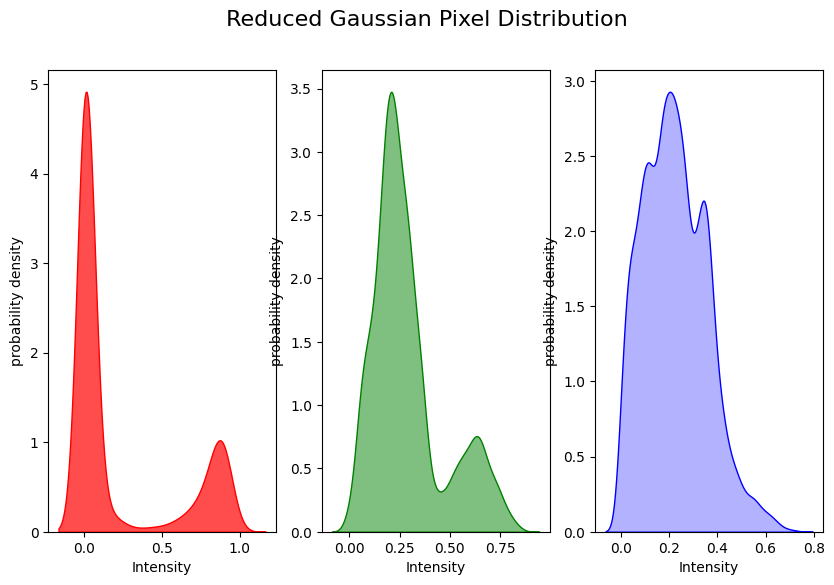

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16 , random_state=42)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
gaus_plot(data , " Reduced Gaussian Pixel Distribution" , colors=new_colors)

Text(0.5, 1.0, 'Elbow Method for Optimal Dimensions in Image Clustering')

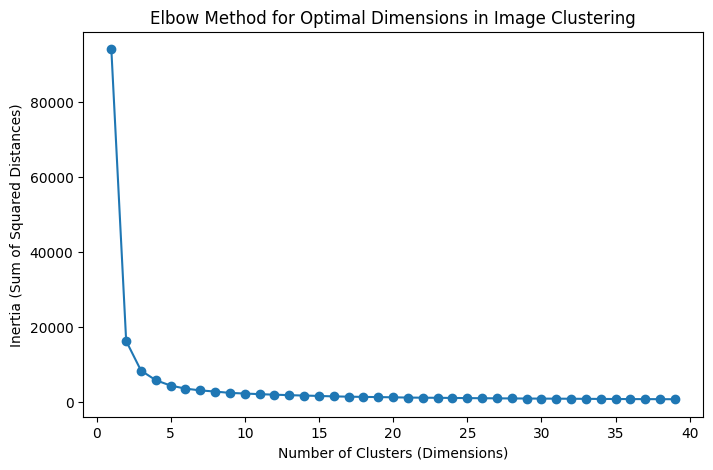

In [ ]:
#now plotting elbow plot to see number of dimensions that retain almost 90% percent of the data
intertia = []
cluster_range  = range(1,40)
for k in cluster_range :
  kmeans = KMeans(n_clusters=k , random_state=42)
  kmeans.fit(data)
  intertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(cluster_range , intertia , marker='o' , linestyle='-')
plt.xlabel("Number of Clusters (Dimensions)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal Dimensions in Image Clustering")

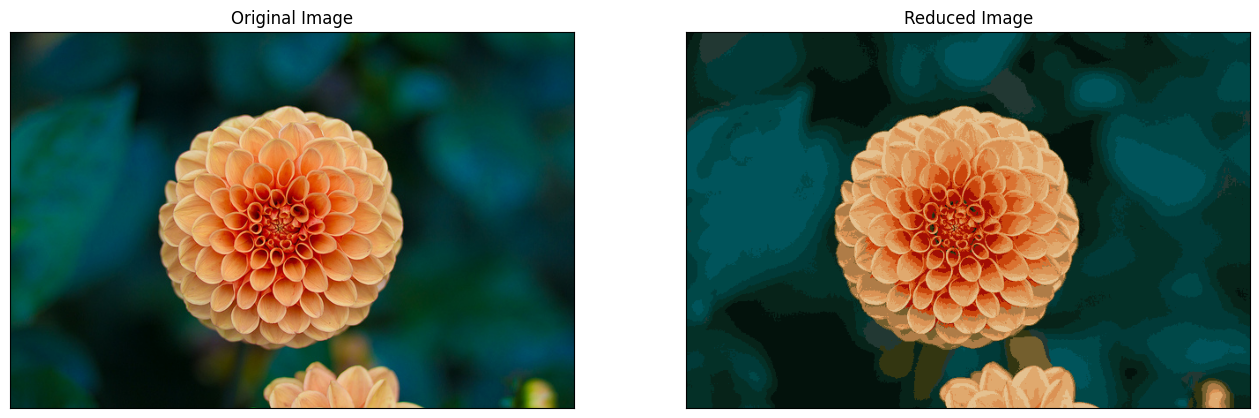

In [ ]:
new_flower = new_colors.reshape(flower.shape)
fig ,ax = plt.subplots(1,2 , figsize=(16,6) , subplot_kw = dict(xticks=[] , yticks=[]))
ax[0].imshow(flower)
ax[0].set_title("Original Image")
ax[1].imshow(new_flower)
ax[1].set_title("Reduced Image")
plt.show()


The reduced dimension image holds intricacies of the flower but loses a bit of background